### PROJECT DESCRIPTION

Facial recognition is a biometric identification method that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. 
The objective of this project is to use Tensorflow and Keras to build a deep convolutional neural network to perform facial recognition 


Dataset Details:
The data for the project is a modified version the ORL face database and is composed of 400 images of size 112 x 92. There are 20 people, and 20 images per person. The dataset has been divided into a training set of 12 images per person, and a test set of 8 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


### Loading and Inspecting the Data

In [2]:
data = np.load('ORL_faces.npz')

In [3]:
type(data)

numpy.lib.npyio.NpzFile

In [4]:
list(data.keys())

['testY', 'testX', 'trainX', 'trainY']

In [5]:
X_train = data['trainX']
y_train = data['trainY']
X_test = data['testX']
y_test = data['testY']

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#Each row in X_train is an image of one of the individuals in the dataset.
#There are 12 images of each individual and 20 individuals, hence 240 rows.

(240, 10304) (240,) (160, 10304) (160,)


In [7]:
X_train
#Each row in the 2-dimensional array below contains a flattened grey - scale image array.

array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [114., 117., 114., ...,  98.,  96.,  98.],
       [105., 105., 107., ...,  54.,  47.,  41.],
       [116., 114., 117., ...,  95., 100., 101.]])

In [8]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

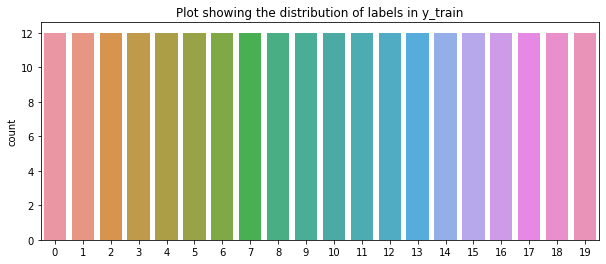

In [9]:
plt.figure(figsize=(10, 4))
sns.countplot(x=y_train)
plt.title('Plot showing the distribution of labels in y_train')
plt.show()

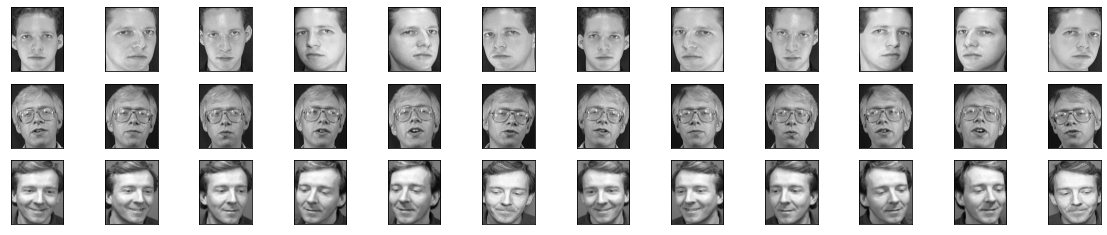

In [10]:
plt.figure(figsize=(20, 4))
for i in range(0, 36):
    index = int(i)
    plt.subplot(3, 12, index + 1)
    plt.imshow(X_train[i].reshape(112, 92), cmap='gray')
    plt.xticks([])
    plt.yticks([])


#Displayed below, are the first 36 images in the dataset.
#The images below confirm that the dataset consists of 12 images of 20 different people.

### Normalizing, Reshaping and Splitting the Data

In [11]:
def normalize_and_reshape(arr):
    arr = arr.reshape(-1, 112, 92, 1)
    arr = arr / 255
    
    return arr

In [12]:
X_train = normalize_and_reshape(X_train)
X_test = normalize_and_reshape(X_test)


In [13]:
print(X_train.max(), X_test.max())

0.9568627450980393 0.9568627450980393


In [14]:
X_trainf, X_val, y_trainf, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10, 
                                                    stratify=y_train)



In [15]:
print(X_trainf.shape, y_trainf.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(216, 112, 92, 1) (216,) (160, 112, 92, 1) (160,) (24, 112, 92, 1) (24,)


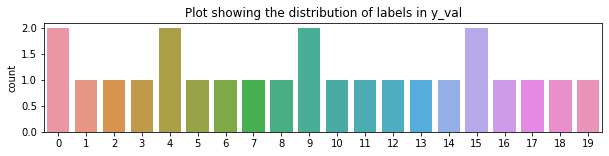

In [16]:
plt.figure(figsize=(10, 2))
sns.countplot(x=y_val)
plt.title('Plot showing the distribution of labels in y_val')
plt.show()

*Because of the small size of the dataset, we are constrained to having just one or two images for each individual in the validation data.*

### Model Building

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, BatchNormalization, Dropout, SpatialDropout2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

In [18]:
tf.random.set_seed(1)

In [19]:
y_trainf = to_categorical(y_trainf)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [20]:
print(X_trainf.shape, y_trainf.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(216, 112, 92, 1) (216, 20)
(24, 112, 92, 1) (24, 20)
(160, 112, 92, 1) (160, 20)


In [21]:
inputs = Input(shape=(112, 92, 1))
X  = Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_uniform')(inputs)
X = MaxPooling2D(pool_size=(2, 2))(X)
X =  BatchNormalization()(X)
X = tf.keras.activations.relu(X)
X = SpatialDropout2D(0.2)(X)
X  = Conv2D(64, kernel_size=(3, 3), kernel_initializer='he_uniform')(X)
X = MaxPooling2D(pool_size=(2, 2))(X)
X = tf.keras.activations.relu(X)
X = SpatialDropout2D(0.2)(X)
X =  BatchNormalization()(X) 
X = Flatten()(X)
X = Dense(256, activation='relu', kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
X = Dense(64, activation='relu', kernel_initializer='he_uniform')(X)
X = Dropout(0.4)(X)
outputs = Dense(20, activation='softmax')(X)

In [22]:
model = Model(inputs=inputs, outputs=outputs)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 112, 92, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 45, 32)        128       
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 55, 45, 32)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 64)        18496 

### Model Compilation and Training

In [24]:
callback = EarlyStopping(monitor='val_loss', mode='min', patience=50)

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5), loss='CategoricalCrossentropy', 
              metrics=['accuracy'])

In [26]:
history = model.fit(X_trainf, y_trainf, batch_size=16, epochs=100, verbose=2, validation_data=(X_val, y_val), 
                    shuffle=False, callbacks=callback)

Epoch 1/100
14/14 - 2s - loss: 6.9757 - accuracy: 0.0648 - val_loss: 6.6443 - val_accuracy: 0.0833
Epoch 2/100
14/14 - 1s - loss: 5.0700 - accuracy: 0.1991 - val_loss: 3.2601 - val_accuracy: 0.0833
Epoch 3/100
14/14 - 1s - loss: 3.8455 - accuracy: 0.2870 - val_loss: 3.1756 - val_accuracy: 0.2083
Epoch 4/100
14/14 - 1s - loss: 3.3515 - accuracy: 0.3102 - val_loss: 3.0477 - val_accuracy: 0.1667
Epoch 5/100
14/14 - 1s - loss: 2.7318 - accuracy: 0.3889 - val_loss: 2.9145 - val_accuracy: 0.0833
Epoch 6/100
14/14 - 1s - loss: 2.4761 - accuracy: 0.3565 - val_loss: 3.0371 - val_accuracy: 0.1250
Epoch 7/100
14/14 - 1s - loss: 2.3495 - accuracy: 0.4352 - val_loss: 3.2342 - val_accuracy: 0.1250
Epoch 8/100
14/14 - 1s - loss: 2.1793 - accuracy: 0.4398 - val_loss: 2.9489 - val_accuracy: 0.2500
Epoch 9/100
14/14 - 1s - loss: 2.2783 - accuracy: 0.4259 - val_loss: 3.1112 - val_accuracy: 0.1667
Epoch 10/100
14/14 - 1s - loss: 2.0187 - accuracy: 0.5509 - val_loss: 3.4340 - val_accuracy: 0.1250
Epoch 11/

14/14 - 1s - loss: 0.1530 - accuracy: 0.9537 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 84/100
14/14 - 1s - loss: 0.1023 - accuracy: 0.9491 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 85/100
14/14 - 1s - loss: 0.0942 - accuracy: 0.9769 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 86/100
14/14 - 2s - loss: 0.0596 - accuracy: 0.9861 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 87/100
14/14 - 1s - loss: 0.1584 - accuracy: 0.9630 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 88/100
14/14 - 1s - loss: 0.2446 - accuracy: 0.9630 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 89/100
14/14 - 1s - loss: 0.1154 - accuracy: 0.9676 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 90/100
14/14 - 1s - loss: 0.1618 - accuracy: 0.9398 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 91/100
14/14 - 2s - loss: 0.0683 - accuracy: 0.9722 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 92/100
14/14 - 2s - loss: 0.1462 - accuracy: 0.9815 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 93/100


### Model  Analysis and Evaluation

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

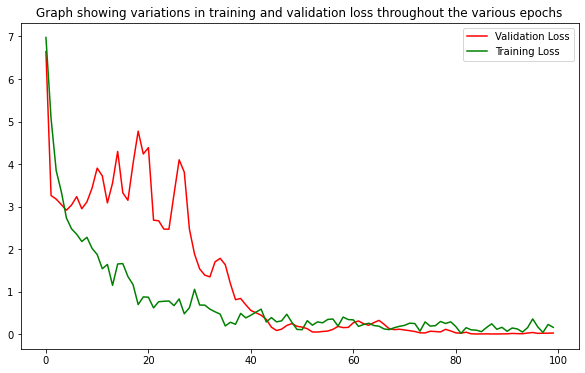

In [28]:
plt.figure(figsize=(10, 6))
ser1 = plt.plot(history.history['val_loss'], label='Validation Loss')
ser1[0].set_color('red')
ser2 = plt.plot(history.history['loss'], label='Training Loss')
ser2[0].set_color('green')
plt.legend()
plt.title('Graph showing variations in training and validation loss throughout the various epochs')
plt.show()


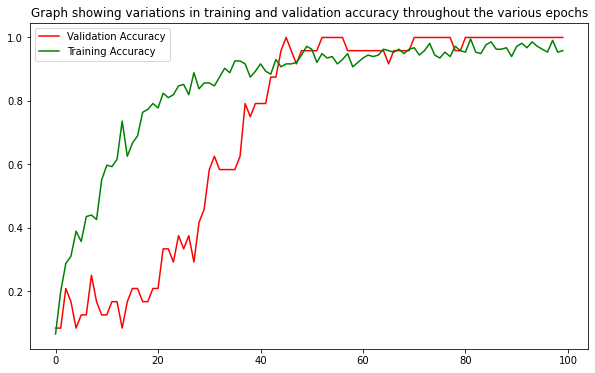

In [29]:
plt.figure(figsize=(10, 6))
ser1 = plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
ser1[0].set_color('red')
ser2 = plt.plot(history.history['accuracy'], label='Training Accuracy')
ser2[0].set_color('green')
plt.legend()
plt.title('Graph showing variations in training and validation accuracy throughout the various epochs')
plt.show()

In [30]:
training_loss = model.evaluate(X_trainf, y_trainf)[0]
validation_loss = model.evaluate(X_val,y_val)[0]
test_loss = model.evaluate(X_test, y_test)[0]

5/5 [==============================] - 0s 39ms/step - loss: 0.3129 - accuracy: 0.9250


In [31]:
print("The losses on the training, validation and test sets are {:.4f}, {:.4f} and {:.4f} respectively".format(
training_loss,validation_loss, test_loss))

The losses on the training, validation and test sets are 0.0000, 0.0279 and 0.3129 respectively


In [32]:
training_accuracy = model.evaluate(X_trainf, y_trainf)[1]
validation_accuracy = model.evaluate(X_val,y_val)[1]
test_accuracy = model.evaluate(X_test, y_test)[1]

5/5 [==============================] - 0s 42ms/step - loss: 0.3129 - accuracy: 0.9250


In [33]:
print("The accuracies on the training, validation and test sets are {:.2f}, {:.2f} and {:.2f} respectively".format(
training_accuracy,validation_accuracy, test_accuracy))

The accuracies on the training, validation and test sets are 1.00, 1.00 and 0.93 respectively


### Discussion



**From the results we see that despite a small amount of data, it is possible to use Keras to build a deep convolutional neural network to perform the task of facial recognition.**

**Even though the model is slighly overfitted to the data in the training set, the accuracy on the test set (93%) is comparable to the validation and test set accuracies of 100%. We would therefore expect this model to generalize reasonably well to previously unseen data. Better performance, however, would almost certainly be achieved with more data.**

**We can safely conclude that the Tensorflow is capable of learning informative features for a facial recognition task even with a small training set and without using more advanced techniques such as transfer learning or data augmentation.**